## Data Cleaning
### Thea Yang, Nick Gammal, Nick Hausman, Charlie Ward

Cleaning file: `application_train.csv`

In [34]:
#importing libraries
import pandas as pd
import numpy as np

In [35]:
# reading in data
df = pd.read_csv("/Users/nickhausman/Desktop/DATA/DATA_403_Project_2/home-credit-default-risk/application_train.csv")

### Correlations

Before edits correlation matrix


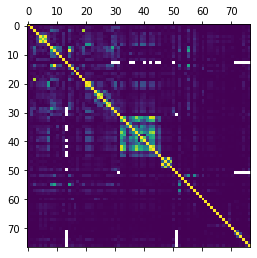

After edits correlation matrix


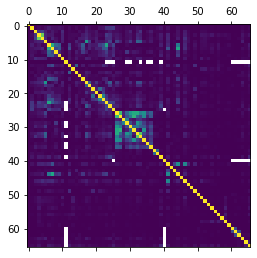

2774426

In [36]:
# %% 
for col in df.columns:
    if 'MODE' in col or 'AVG' in col:
        df = df.drop(col, axis=1)

# %%
corr = df.corr().abs()

# %%
import matplotlib.pyplot as plt
print('Before edits correlation matrix')
plt.matshow(df.corr().abs())
plt.show()

# %%
desc = pd.read_csv('/Users/nickhausman/Desktop/DATA/P2/home-credit-default-risk/HomeCredit_columns_description.csv', encoding = "ISO-8859-1")
desc['Description'][1]

# %%
with open('highcorrs.txt', 'w') as f:
    for index, row in corr.iteritems():
        for col in corr.columns:
            if row[col]  > 0.8 and index != col:
                f.write(str(col))
                f.write('\n')
                f.write(str(list(desc[desc['Row'] == col]['Description'])[0]))
                f.write('\n')
                f.write(str(index))
                f.write('\n')
                f.write(str(list(desc[desc['Row'] == index]['Description'])[0]))
                f.write('\n')
                f.write(str(row[col]))
                f.write('\n')
                f.write('\n')
    bad_corr_choice_drops = ['AMT_GOODS_PRICE', 'CNT_CHILDREN', 'FLAG_EMP_PHONE', 'REGION_RATING_CLIENT_W_CITY', 'REG_REGION_NOT_WORK_REGION', 'LIVE_CITY_NOT_WORK_CITY', 'LIVINGAPARTMENTS_MEDI', 'ELEVATORS_MEDI', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'LIVINGAREA_MEDI']
    f.write(str(bad_corr_choice_drops))
    f.write('\n')

# %% [markdown]
# See highcorrs.txt for columns with high correlations, we read through these and picked the more reasonable/understandable ones

# %%
df = df.drop(bad_corr_choice_drops, axis=1)
corr = df.corr().abs()
len(df.columns)

# %%
import matplotlib.pyplot as plt
print('After edits correlation matrix')
plt.matshow(df.corr().abs())
plt.show()

df.isna().sum().sum()


In [37]:
# dropping obs for rows that have very little missing values or can't be modified and we still want to keep
clean_df = df[df['DAYS_LAST_PHONE_CHANGE'].notnull() & 
   df['CNT_FAM_MEMBERS'].notnull() & 
   df['EXT_SOURCE_2'].notnull() & 
   df['DEF_30_CNT_SOCIAL_CIRCLE'].notnull() &
   df['OBS_30_CNT_SOCIAL_CIRCLE'].notnull() &
   df['EXT_SOURCE_3'].notnull()
  ]

# imputing amt ammunity column with mean amt
mean_amt_annuity = clean_df.loc[:,'AMT_ANNUITY'].mean()
clean_df['AMT_ANNUITY'].fillna(value=mean_amt_annuity, inplace=True)
clean_df.isna().sum().sum()

/var/folders/yd/nfpg90257z743pz74p6rft340000gn/T/ipykernel_57461/2408087529.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['AMT_ANNUITY'].fillna(value=mean_amt_annuity, inplace=True)


1948831

### Functions

In [38]:
def map_amt_req(c):
    if c >= 1:
        return 1
    else:
        return 0
    
# discretize own car age
def agemap(num):
    if num <= 1:
        return "new"
    elif num <= 5:
        return "young"
    elif num <= 10:
        return "middle"
    elif num <= 20:
        return "aging"
    elif num <= 60:
        return "old"
    elif num > 60:
        return "classic"
    else:
        return "no car"

# Refactor occupation type
blue = ["Laborers", "Drivers", "Medicine staff", "Security staff", "Cooking staff", "Cleaning staff", "Private service staff", "Low-skill Laborers", "Secretaries", "Waiters/barmen staff"]
white = ["Sales staff", "Core staff", "Managers", "High skill tech staff", "Accountants", "Realty agents", "HR staff", "IT staff"]
def workmap(job):
    if job in blue:
        return "blue"
    elif job in white:
        return "white"
    else:
        return "other"
    
def accompany_map(c):
    if c == 'Unaccompanied':
        return 'Unaccompanied'
    elif c in ['Family', 'Spouse, partner', 'Children', 'Other_B', 'Other_A', 'Group of people']:
        return 'Accompanied'
    else:
        return 'Unknown'

In [39]:
# makng new column based on whether the person has made an enquiry to the Credit Bureau at all in the past year

clean_df['SUM_AMT_REQ_CREDIT'] = clean_df.loc[:,['AMT_REQ_CREDIT_BUREAU_MON',
'AMT_REQ_CREDIT_BUREAU_WEEK',
'AMT_REQ_CREDIT_BUREAU_DAY',
'AMT_REQ_CREDIT_BUREAU_HOUR',
'AMT_REQ_CREDIT_BUREAU_QRT',
'AMT_REQ_CREDIT_BUREAU_YEAR']].sum(axis=1)

clean_df['AMT_REQ_CREDIT'] = clean_df.loc[:,'SUM_AMT_REQ_CREDIT'].apply(map_amt_req)

clean_df = clean_df.drop(columns=['AMT_REQ_CREDIT_BUREAU_WEEK',
'AMT_REQ_CREDIT_BUREAU_DAY',
'AMT_REQ_CREDIT_BUREAU_HOUR',
'AMT_REQ_CREDIT_BUREAU_QRT',
'AMT_REQ_CREDIT_BUREAU_YEAR',
'AMT_REQ_CREDIT_BUREAU_MON',
'SUM_AMT_REQ_CREDIT'])
clean_df.isna().sum().sum()

/var/folders/yd/nfpg90257z743pz74p6rft340000gn/T/ipykernel_57461/3360359985.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['SUM_AMT_REQ_CREDIT'] = clean_df.loc[:,['AMT_REQ_CREDIT_BUREAU_MON',
/var/folders/yd/nfpg90257z743pz74p6rft340000gn/T/ipykernel_57461/3360359985.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['AMT_REQ_CREDIT'] = clean_df.loc[:,'SUM_AMT_REQ_CREDIT'].apply(map_amt_req)


1948831

In [40]:
# remapping categorical columns to simplify levels and account for missing values
clean_df['OCCUPATION_TYPE'] = clean_df['OCCUPATION_TYPE'].apply(workmap)
clean_df['OWN_CAR_AGE'] = clean_df['OWN_CAR_AGE'].apply(agemap)
clean_df['NAME_TYPE_SUITE']= clean_df['NAME_TYPE_SUITE'].apply(accompany_map)

In [41]:
# get all the 'housing-related' columns and keep only the median ones
mode_cols = np.array(clean_df.columns[clean_df.columns.str.contains("_MODE")])
avg_cols = np.array(clean_df.columns[clean_df.columns.str.contains("_AVG")])
med_cols = np.array(clean_df.columns[clean_df.columns.str.contains("_MEDI")])

clean_df = clean_df.drop(columns=mode_cols).drop(columns=avg_cols)

In [42]:
# code related to created a 'HOUSING SCORE' based on number of housing columns that are above average for that row
clean_df = clean_df.reset_index(drop=True)
combine = clean_df[med_cols]

housing_columns_above_mean_cnt = pd.Series(np.zeros(len(combine.index)))
for col in combine.columns:
    housing_columns_above_mean_cnt += (combine[col] > combine[col].mean()).astype(int)

na_bool_series = [combine[col].isna() for col in combine.columns]
undefined_housing_indicies = []
for i in range(len(na_bool_series[0])):
    if all(l[i] for l in na_bool_series):
        undefined_housing_indicies.append(i)
        
for i in undefined_housing_indicies: housing_columns_above_mean_cnt[i] = 'NO INFO' 
    
clean_df['HOUSING_SCORE'] = housing_columns_above_mean_cnt
# dropping the original columns
clean_df = clean_df.drop(columns=med_cols)

In [43]:
# final filter to get columns with only known housing scores
clean_df_2 = clean_df[clean_df['HOUSING_SCORE'] != 'NO INFO']

In [44]:
# check for missing values
test = pd.DataFrame(clean_df.isna().sum()).reset_index()
test.columns = ['name', 'count']
test[test['count'] > 0 ]

,name,count
35,EXT_SOURCE_1,136139


## Adding Additional Features from Supplemental Tables

In [45]:
# removing flag document columns
clean_df_2 = clean_df_2.drop(clean_df_2.loc[:, 'FLAG_DOCUMENT_2':'FLAG_DOCUMENT_21' ].columns, axis=1)

In [46]:
# reading in additional tables
df_credit = pd.read_csv('home-credit-default-risk/credit_card_balance.csv')
df_prev = pd.read_csv('home-credit-default-risk/previous_application.csv')

### Average Annuity Credit Ratio from Previous Loans

In [47]:
# get average annuity credit ratio for previous applications
df_prev['ANNUITY_CREDIT_RATIO'] = df_prev['AMT_ANNUITY']/df_prev['AMT_CREDIT']
avg_ann_cred_ratio = pd.DataFrame(df_prev.groupby('SK_ID_CURR')['ANNUITY_CREDIT_RATIO'].mean()).reset_index()

In [48]:
# merge in new feature
df_clean = clean_df_2.merge(avg_ann_cred_ratio, on='SK_ID_CURR', how='left')

In [49]:
df_clean['TARGET'].value_counts()

0    118965
1      8676
Name: TARGET, dtype: int64

In [50]:
# there's not much lost from removing obs that don't have previous data on avg annuity credit ratio so dropping
df_clean[df_clean['ANNUITY_CREDIT_RATIO'].notnull()]['TARGET'].value_counts()

0    111463
1      8249
Name: TARGET, dtype: int64

In [51]:
df_clean = df_clean[df_clean['ANNUITY_CREDIT_RATIO'].notnull()]

### Number of Months of Missed Minimum Payments

In [52]:
df_credit['payment diff'] = df_credit['AMT_PAYMENT_CURRENT'] - df_credit['AMT_INST_MIN_REGULARITY']
df_credit['CNT_MISSED_MIN'] = np.where(df_credit['payment diff'] < 0, 1, 0)

cnt_missed_min = pd.DataFrame(df_credit.groupby('SK_ID_CURR')['CNT_MISSED_MIN'].sum()).reset_index()

In [53]:
# merge in new feature
df_clean = df_clean.merge(cnt_missed_min, on='SK_ID_CURR', how='left')

In [54]:
# fill in 0 if never missed min
df_clean['CNT_MISSED_MIN'].fillna(0, inplace=True)

### Number of Previous Total Applied Loans & Number of Previous Accepted Loans

In [55]:
# previous total amount of applied loans per id
prev_loan_cnt = pd.DataFrame(df_prev['SK_ID_CURR'].value_counts()).reset_index()
prev_loan_cnt.columns = ['SK_ID_CURR', 'CNT_PREV_LOANS']

In [56]:
# previous total amount of accepted loans per id
prev_acc_loan = pd.DataFrame(df_prev[df_prev['NAME_CONTRACT_STATUS'] == 'Approved']['SK_ID_CURR'].value_counts()).reset_index()
prev_acc_loan.columns = ['SK_ID_CURR', 'CNT_ACCEPTED_LOANS']

In [57]:
# merge in new feature
df_clean = df_clean.merge(prev_loan_cnt, on='SK_ID_CURR', how='left')
df_clean = df_clean.merge(prev_acc_loan, on='SK_ID_CURR', how='left')

In [58]:
# if there is missing data means they never previously applied for loan -> fill in with 0
df_clean['CNT_PREV_LOANS'].fillna(0, inplace=True)
df_clean['CNT_ACCEPTED_LOANS'].fillna(0, inplace=True)

In [59]:
df_clean = df_clean.rename(columns={'ANNUITY_CREDIT_RATIO':'PREV_AVG_AC_RATIO'})
df_clean.isna().sum().sum()

63902

### Bureau data

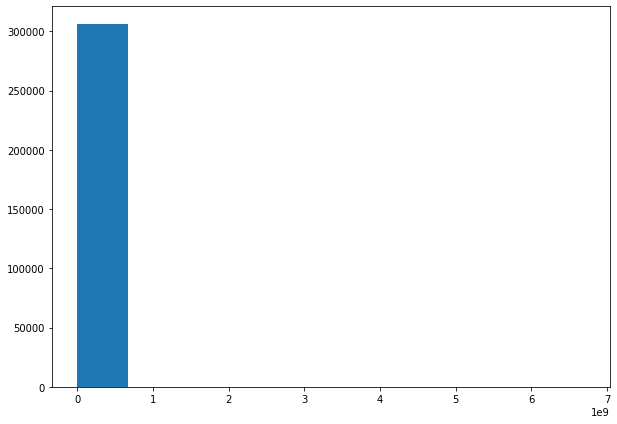

Eta: 1e-16; Iterations: 75000
GRADIENT DID NOT CONVERGE. RESULTS ARE BAD


/Users/nickhausman/Desktop/DATA/DATA_403_Project_2/Models.py:95: RuntimeWarning: underflow encountered in exp
  probabilities = 1 / (1 + np.exp(-1 * X @ B))


63489

In [60]:
# %%
df = pd.read_csv('/Users/nickhausman/Desktop/DATA/DATA_403_Project_2/cleaned_training_data.csv')
bb = pd.read_csv('/Users/nickhausman/Desktop/DATA/P2/home-credit-default-risk/bureau_balance.csv')
b = pd.read_csv('/Users/nickhausman/Desktop/DATA/P2/home-credit-default-risk/bureau.csv')
df.head()

# %%
bb = bb.drop('MONTHS_BALANCE', axis=1)

# %% [markdown]
# I dropped months_balance, because it seems mostly useless as were are only looking to penalize late payments, and not consider on time ones. 

# %%
b = b[['SK_ID_CURR', 'SK_ID_BUREAU', 'AMT_CREDIT_SUM_OVERDUE', 'AMT_CREDIT_MAX_OVERDUE', 'CREDIT_DAY_OVERDUE', 'AMT_CREDIT_SUM']]

# %% [markdown]
# After redeaing through the bureau.csv descriptions, only this subset seems useful for our calculations.

# %%
bb.head()

# %%
bb = bb[(bb.STATUS != 'X') & (bb.STATUS != 'C') & (bb.STATUS != '0')] # Only want to see bad examples, not goood ones
bb.STATUS = bb.STATUS.astype(int)
bb.STATUS.value_counts()

# %%
b.head()

# %%
comb = pd.merge(b, bb, on='SK_ID_BUREAU', how='left').fillna(0).groupby(['SK_ID_CURR']).sum().drop('SK_ID_BUREAU', axis=1).add_prefix('SUM_OF_')
comb.head()

# %% [markdown]
# Going to replace NA values with 0, seems resonable because other columns are usually 0. Did outer join so we don't eliminate those without a status

# %%
comb.describe()

# %% [markdown]
# Creating a score- how to do it? 

# %%
poss_score = comb.sum(axis=1)
poss_score.describe()

# %%
from matplotlib import pyplot as plt
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(poss_score)
plt.show()

# %% [markdown]
# Clearly doesn't work, lets try using logistic regression to create a probability score

# %%
for_lr = pd.merge(df[['SK_ID_CURR', 'TARGET']], comb, on='SK_ID_CURR').drop('SK_ID_CURR', axis=1)
for_lr

# %%
for_lr.describe()

# %%
for_lr[for_lr['TARGET']==1].describe()

# %%
def pad_B0(X, ret_numpy=True):
    X['B0'] = 1
    X = X[['B0'] + list(X.drop(columns='B0').columns)]
    if ret_numpy:
        return X.to_numpy() 
    return X

# %%
from Models import Logistic, Model
 
lr = Model('Logistic')
Y = for_lr['TARGET']
X = for_lr.drop('TARGET', axis=1)
B = lr.fit(pad_B0(X), Y.to_numpy(), etas=[1e-16])
probs = lr.predict(X.to_numpy(), B, True, .5)

# %%
lr.coef_

# %% [markdown]
# These coefficients are all really really small, so our probabilities will all be small (makes sense unbalanced data)


df_clean = pd.merge(df_clean, comb, on='SK_ID_CURR')
df_clean.isna().sum().sum()




### Dimensionality reductions

In [61]:
len(df_clean.columns)

52

In [62]:
df_clean = df_clean.drop(['FLAG_MOBIL', 'EXT_SOURCE_1'], axis=1) # breaks gradient descent

In [63]:
for col in df_clean.columns:
    if len(df_clean[col].unique()) == 2:
        df_clean[col] = pd.Series(np.where(df_clean[col].values == df_clean[col].unique()[0], 1, 0), df_clean.index)
        

In [64]:
i = 30
df_clean.columns[i:i+10]

Index(['LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT'],
      dtype='object')

In [65]:
# export to csv
df_clean.to_csv('cleaned_training_data.csv', index=False)
df_clean.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_TYPE_SUITE,...,HOUSING_SCORE,PREV_AVG_AC_RATIO,CNT_MISSED_MIN,CNT_PREV_LOANS,CNT_ACCEPTED_LOANS,SUM_OF_AMT_CREDIT_SUM_OVERDUE,SUM_OF_AMT_CREDIT_MAX_OVERDUE,SUM_OF_CREDIT_DAY_OVERDUE,SUM_OF_AMT_CREDIT_SUM,SUM_OF_STATUS
0,100002,1,1,M,1,1,202500.0,406597.5,24700.5,Unaccompanied,...,0.0,0.051670,0.0,1,1.0,0.0,30053.79,0,4343645.565,27.0
1,100016,0,1,F,1,1,67500.0,80865.0,5881.5,Unaccompanied,...,2.0,0.102497,0.0,4,4.0,0.0,0.00,0,474984.000,0.0
2,100017,0,1,M,0,0,225000.0,918468.0,28966.5,Unaccompanied,...,7.0,0.085245,0.0,2,2.0,0.0,0.00,0,859770.000,0.0
3,100022,0,0,F,1,1,112500.0,157500.0,7875.0,Accompanied,...,2.0,0.065560,0.0,1,1.0,0.0,0.00,0,1057500.000,0.0
4,100026,0,1,F,1,0,450000.0,497520.0,32521.5,Unaccompanied,...,3.0,0.117923,0.0,3,2.0,0.0,0.00,0,5625000.000,0.0
